In [3]:
from typing import Sequence, Literal

import torch
from torch import nn

import jax
from jax import random
from jax import numpy as jnp
from rich import console
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_theme(style="pastel")
sns.color_palette("pastel");

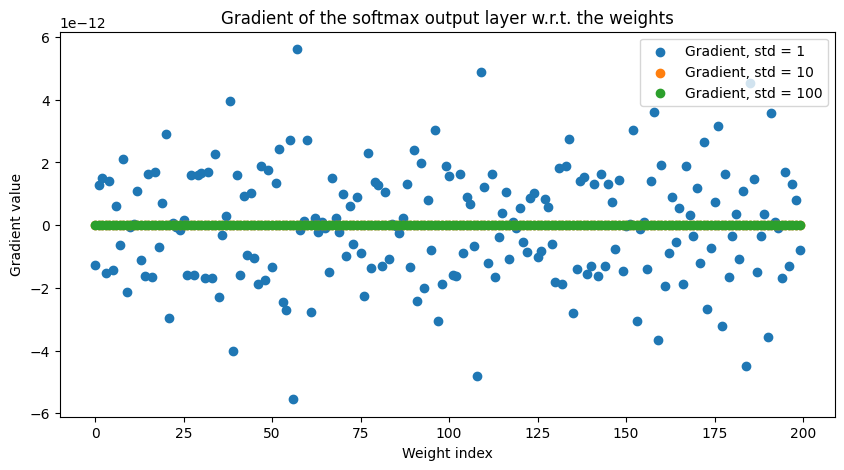

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt


# Define a simple neural network with a softmax output layer
class Perceptron(nn.Module):
    """A simple neural network consisting of a single perceptron with a softmax output layer.
    """
    def __init__(
        self,
        input_dim: int = 100,
        mean: float = 0.0,
        std: float = 1.0,
    ):
        """Initialize the network.

        Args:
            mean (float, optional): the mean of the normal distribution used to initialize the weights. Defaults to 0.0.
            std (float, optional): the standard deviation of the normal distribution used to initialize the weights. Defaults to 1.0.
        """
        super(Perceptron, self).__init__()
        self.weight = nn.Parameter(torch.normal(mean=mean, std=std, size=(input_dim, 2)))
        self.bias = nn.Parameter(torch.zeros(2))

    def forward(self, x: torch.Tensor) -> torch.Tensor:   
        x = torch.matmul(x, self.weight) + self.bias
        return F.softmax(x, dim=1)

input_dim = 100

# plot
plt.figure(figsize=(10, 5))
plt.title("Gradient of the softmax output layer w.r.t. the weights")
plt.xlabel("Weight index")
plt.ylabel("Gradient value")

for std in [1, 10, 100]:
    # Initialize the network
    net = Perceptron(input_dim=input_dim, std=std)

    # Example input
    input_data = torch.randn(2, input_dim)

    # Forward pass
    output = net(input_data)

    # Example target (for loss calculation)
    target = torch.tensor([[0.0, 1.0], [1.0, 0.0]])

    loss_function = nn.MSELoss()
    loss = loss_function(output, target)

    # Backward pass
    loss.backward()

    # mean = net.weight.grad.mean()
    # std = net.weight.grad.std()
    y = net.weight.grad.numpy().flatten()
    x = range(len(y))
    plt.scatter(x, y, label="Gradient, std = {}".format(std))

# plt.yscale("log")
plt.legend()
plt.show()


In [2]:
output

tensor([[1.0000e+00, 1.5061e-09],
        [1.0000e+00, 2.8834e-28]], grad_fn=<SoftmaxBackward0>)

In [3]:
# Print the gradients of the first layer
net.weight.grad

tensor([[ 0.0000e+00, -1.6918e-09],
        [ 0.0000e+00,  1.5307e-09],
        [ 0.0000e+00,  7.8656e-10],
        [ 0.0000e+00,  2.3328e-11],
        [ 0.0000e+00, -1.1181e-09],
        [ 0.0000e+00,  2.9220e-10],
        [ 0.0000e+00,  3.4782e-10],
        [ 0.0000e+00,  1.0392e-09],
        [ 0.0000e+00,  1.0413e-09],
        [ 0.0000e+00,  6.1680e-10]])

In [45]:
def backward_hook(module, grad_input, grad_output):
    print(module)
    print(grad_input)
    print(grad_output)
    print()

model.register_backward_hook(backward_hook)

In [49]:
# view grad wrt q
model.softmax.grad

AttributeError: 'Softmax' object has no attribute 'grad'

In [46]:
inputs = torch.randn(1, 10, 100)
outputs = model(inputs)
loss = outputs.sum()
loss.backward()

tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
         [0.0000e+00, 1.1846e-08, 2.7240e-02, 9.7276e-01, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0

In [ ]:
# set the main RNG to make the notebook reproducible
main_rng = random.PRNGKey(0)

In [ ]:
def _rand_matrix_inner_product(
    dims: int,
    mat_shape: Sequence[int],
    rng_key: random.PRNGKey
) -> jax.Array:
    """Computes the inner product between two matrices with random values sampled from N(0, 1).

    Args:
        dims (int): the outer dimension of the matrices.
        mat_shape (Sequence[int], optional): the shape of the matrices.
        rng_key (random.PRNGKey): the random number generator key.
    
    Returns:
        jax.Array: the inner product between the two matrices.
    """
    rng_key_a, rng_key_b = random.split(rng_key, 2)

    # initialize two vectors with random values sampled from N(0, 1)
    A = random.normal(rng_key_a, (*mat_shape, dims))
    B = random.normal(rng_key_b, (*mat_shape, dims))

    # compute the dot product between the two vectors
    dot_product = jnp.matmul(A, B.transpose(0, 2, 1))

    return dot_product


def plot_dp_mean_var_vs_n_elements(
    dim_choices: list[int],
    mat_shape: Sequence[int] = (1, 100),
    mean_plot_yscale: Literal["log", "linear"] = "linear",
    var_plot_yscale: Literal["log", "linear"] = "log",
    color: str = "magenta",
):
    """Creates a plot of the mean and variance of the inner product between two matrices,
    as a function of the size of the outer dimension of the matrix.

    Args:
        dim_choices (list[int]): _description_
        mat_shape (Sequence[int], optional): _description_. Defaults to (1, 100).
        mean_plot_yscale (Literal['log', 'linear'], optional): _description_. Defaults to "linear".
        var_plot_yscale (Literal['log', 'linear'], optional): _description_. Defaults to "log".
    """
    fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharey=False)

    local_rng_key = random.split(main_rng, 1)[0]

    means = jnp.zeros(len(dim_choices))
    stds = jnp.zeros(len(dim_choices))

    for idx, dims in enumerate(dim_choices):
        # compute the dot product between the two vectors
        dot_product = _rand_matrix_inner_product(dims, mat_shape, local_rng_key)

        # compute the mean and std of the dot product
        mean = jnp.mean(dot_product)
        std = jnp.var(dot_product)

        means = means.at[idx].set(mean)
        stds = stds.at[idx].set(std)

        local_rng_key, _ = random.split(local_rng_key, 2)

    # adjust point size
    plt.rcParams["lines.markersize"] = 5
    axs[0].plot(dim_choices, means, "o", color=color)
    axs[1].plot(dim_choices, stds, "o", color=color)
    
    axs[0].set_xlabel("Outer matrix dimension (d)")
    axs[0].set_ylabel("Mean")
    axs[1].set_xlabel("Outer matrix dimension (d)")
    axs[1].set_ylabel("Variance")

    axs[0].set_yscale(mean_plot_yscale)
    axs[1].set_yscale(var_plot_yscale)

    axs[0].set_xscale("log")
    axs[1].set_xscale("log")

    plt.tight_layout()
    plt.show()


def plot_softmax_output_hist(
    dim_choices: list[int],
    mat_shape: Sequence[int] = (1, 100),
    apply_scaling: bool = False,
    rng: random.PRNGKey = main_rng
):
    """Creates a plot of the softmax output distribution for different values of the outer dimension of the matrix.

    Args:
        dim_choices (list[int]): a list of values for the outer dimension of the matrix.
        mat_shape (Sequence[int], optional): the shape of the matrices. Defaults to (1, 100).
        apply_scaling (bool, optional): whether to apply the inverse of the square root of 
            the outer dimension to the dot product. Defaults to False.
        rng (random.PRNGKey, optional): the random number generator key. Defaults to main_rng.
    """
    fig, axs = plt.subplots(1, len(dim_choices), figsize=(12, 4), tight_layout=True, sharex=True, sharey=True)

    for idx, dims in enumerate(dim_choices):
        scaling_factor = 1 / jnp.sqrt(dims) if apply_scaling else 1.
        
        # compute the dot product between the two vectors
        attn_logits = _rand_matrix_inner_product(dims, mat_shape, rng) * scaling_factor
        attn_weights = jax.nn.softmax(attn_logits)
        axs[idx].set_yscale("log")

        sns.histplot(attn_weights.flatten(), bins=100, color="magenta", ax=axs[idx])
        
        axs[idx].set_title(f"d = {dims}")
    
    # set x axis label for all subplots
    axs[0].set_xlabel("Softmax output value")




In [ ]:
data = plot_softmax_output_hist([1, 10, 100, 1000, 10000])

In [ ]:
plot_softmax_output_hist([1, 10, 100, 1000, 10000], apply_scaling=True)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


def viz_array(
    arr: jax.Array,
    title: str = "",
    title_loc: str = "left",
    edge_colors: str | list[str] = "#89cff0",
) -> None:
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(10, 2))
    ax.set_xlim(-1, len(data))
    ax.set_ylim(-1, 1)
    ax.axis('off')  # Hide the axes

    # Set the title
    ax.set_title(title, fontsize=20, pad=10, loc=title_loc)
    
    if isinstance(edge_colors, str):
        edge_colors = [edge_colors] * len(arr)
    
    # Draw rectangles and annotate
    for i, value in enumerate(arr):
        # Draw the rectangle
        color = edge_colors[i]
        
        offset = i * 0.25
        rect = Rectangle((i - 0.5 + offset, -0.5), 1, 1, fill=None, edgecolor=color, lw=2)
        ax.add_patch(rect)
        
        # Annotate with the value
        ax.text(i, 0, f"{value:.3f}", va='center', ha='center')

    plt.show()

# Sample list
data = random.normal(main_rng, (5,))
viz_array(data, title="Logits array", edge_colors="#89cff0")
viz_array(jax.nn.softmax(data), title="Softmax array", edge_colors="#89cff0")
new_data = data.at[3].set(30).at[1].set(23)

color_scheme = ["#89cff0"] + ["#ffe5b4"] + ["#89cff0"] + ["#ffe5b4"] + ["#89cff0"]
viz_array(new_data, title="Logits array", edge_colors=color_scheme)
viz_array(jax.nn.softmax(new_data), title="Softmax array", edge_colors=color_scheme)


In [ ]:
powers = jnp.arange(0, 7)
dim_choices = jnp.power(10, powers).astype(int)
plot_dp_mean_var_vs_n_elements(dim_choices)

In [ ]:
arr = jnp.asarray([[3, 2.4, 3.6], [4.8, 6, 5.2]])
print_matrix("Array", arr)

# apply softmax
soft_arr = jax.nn.softmax(arr)
print_matrix("Softmax(Array)", soft_arr)

We can see that the largest values in our original array are still the largest values in our transformed array, but all numbers have been scaled such that they add up to 1 (along the rows). This is grat because we can use these numbers as probabilities or as a weights for example. 

However, what happens, when one number because quite a bit larger than the others?

In [ ]:
arr = jnp.asarray([[3, 2.4, 10], [4.8, 10, 5.2]])
print_matrix("Array", arr)

# apply softmax
soft_arr = jax.nn.softmax(arr)
print_matrix("Softmax(Array)", soft_arr)

The softmax becomes saturated. What does that mean? That one value becomes very close to 1 while the others are close to 0. The effects get worse as the range of the numbers in the array gets larger. The largest value in the arrays squashes out the other values.

In [ ]:
arr = jnp.asarray([[0.1, 2.4, 10], [0.8, 10, 5.2]])
print_matrix("Array", arr)

# apply softmax
soft_arr = jax.nn.softmax(arr)
print_matrix("Softmax(Array)", soft_arr)

### So Why Is That A Problem?

This can become a serious issue in a neural network during back-propagation. Consider the derivative of the softmax (see [here](https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative) for derivation)

$$S_j = \frac{e^{a_j}}{\sum_{k=1}^{N} e^{a_k}} \quad \forall j \in 1..N$$

$$D_{j} S_{i} = \begin{cases} 
S_{i}(1 - S_{j}) & \text{if } i = j \\
-S_{j} S_{i} & \text{if } i \neq j 
\end{cases}$$

When the softmax saturates, i.e. one value approaches 1 and others approach 0, this leads to the derivative being tiny (as per the equation above). This makes it much harder for the nueral network to learn as weight updates happen slower.

We want to avoid that when we multiply our `Queries` and `Keys` matrices. We want to make sure that they do not produce values, such that when they are passed through the softmax would result in a wild range of numbers causing the output of the softmax to saturate. 

Spoiler! That's why we apply the scaling, which is what other sources explain. However, let's see the details of why we need it. Why is it that the product of the `Quries` and `Keys` matrices results in numbers that would saturate the softmax?

### Code Time!

I am going to initialize two matrices where each entry is sampled from a standard normal distribution, i.e. $X \sim \mathcal{N}(0, 1)$

<b>Why two matrices? Aren't there three in the attention equation?</b>

Yes, there are! However, here we are going to forget about the last step of multiplying by the values matrix, we're concerned with the scaling factor!

<b>Ok, and why sample from the standard normal distribution?</b>

We want the mean of our values to be close to zero to ensure that we keep activiations of the neural network from exploding (but not zero because zero will result in zero gradients). For the variance, we want to keep the range of our values small specifically to avoid saturation when applying the softmax function. Too small of a variance could result in similar updates being made to many weights which could cause neurons to change symmetrically and lead to poorer model performance. On the other hand too large of a variance and we could end up with softmax saturation and vanishing gradients. A variance of `1` appears to be a reasonable choice.


In [ ]:
key1, key2 = random.split(main_rng, 2)

In [ ]:
batch_size = 1
seq_len = 100
d_q = d_k = 1000

q = random.normal(key1, (batch_size, seq_len, d_q))
k = random.normal(key2, (batch_size, seq_len, d_k))

In [ ]:
# print mean and std of q and k
print(f"[bold]q mean: {jnp.mean(q)}, std: {jnp.std(q)}[/bold]")
print(f"[bold]k mean: {jnp.mean(k)}, std: {jnp.std(k)}[/bold]")

Looking at their means and standard deviations, we see that they're close to the 0 and 1 we initialized them with. Great, no surprises there. 
Let's multiply the two (like in attention) and see what happens.

In [ ]:
attn_logits = jnp.matmul(q, k.transpose((0, 2, 1)))
print_matrix("attn_logits", attn_logits)

print(f"[bold]attn_logits mean: {jnp.mean(attn_logits)}, std: {jnp.std(attn_logits)}[/bold]")

OOOOF!! The standard deviation (and therefore the variance) of our values has sky-rocketed! Let's plot a historgram of the values of the resultant matrix

In [ ]:
# histogram of attn_logits, y axis is log scale
plt.hist(attn_logits.flatten(), bins=100);
plt.yscale('log')

Ok, now let's apply the softmax and see what happens

In [ ]:
attn_weights = jax.nn.softmax(attn_logits)

print_matrix("attn_weights", attn_weights)
print(f"[bold]attn_weights mean: {jnp.mean(attn_weights)}, std: {jnp.std(attn_weights)}[/bold]")

In [ ]:
plt.hist(attn_weights.flatten(), bins=100);
plt.yscale('log')

We see two peaks, one at 0 and another at 1, which tells us that there are many places where the softmax is pushed to its extreme values. As we saw before that has an effect on the gradients, specifically leading to really small gradient values. 

### What's Going On and How Do We Fix That?

Time for some math! Check out this [post](https://ai.stackexchange.com/questions/21237/why-does-this-multiplication-of-q-and-k-have-a-variance-of-d-k-in-scaled) for some more info!

Our `Q` and `K` matrices have values that are sampled from a standard normal distribution. Let's call values of `Q` random variables `X` and values of `K` random variables `Y`, where `X` and `Y` are independent random variables. Since all values will be independent and identically distributed (iid) let's consider an arbitrary entry in both matrices $X_ii$ and $Y_jj$

$$ X_ii \sim \mathcal{N}(0, 1)$$
$$ Y_jj \sim \mathcal{N}(0, 1)$$

we also know that

$$\mathbb{E}[X_ii] = \mathbb{E}[Y_jj] = 1$$
$$Var[X_ii] = Var[Y_jj] = 1$$

We observed earlier that when we multiply our two matrices, the variance explodes. Therefore, it would be great if we could figure out an expression for the variance of our matrix product since that could give us insights into what's going on. How do we find an expression for the variance of an entry of our result matrix? 

Let's start by calling our result matrix `R`, it's defined as 

$$R = Q \cdot K^T$$

What does a single entry in `R` look like? What are the operations that result in that value? 
Assuming you are familar with linear algebra, a single value of `R`, say $R_{r,c}$ is defined as the vector dot product between row `r` of the `Q` matrix and column `c` of the $K^T$ matrix. It looks something like this

$$
\begin{bmatrix}
- & Q_r & - \\
\end{bmatrix}
\begin{bmatrix}
|\\
K^T_c \\
|\\
\end{bmatrix} = Q_{r1} * K^T_{c1} + Q_{r2} * K^T_{c2} + \ldots = \sum_{d=dim(Q_{r})=dim(K^T_{c})}Q_{rd} * K^T_{cd}
$$

Let's take a quick step back and remember that values from our `Q` and `K` matrices are random variables `X` and `Y`. This means that a single entry of our `R` (result) matrix will be a random variable as well. Let's call it `Z_l`. The expected value and variance of `Z_l` will be given by

$$\mathbb{E}[Z_l] = \mathbb{E}[\sum_{d}Q_{rd} * K^T_{cd}] = \mathbb{E}[\sum_{d}X_{rd} * Y_{cd}]$$
$$Var[Z_l] = Var[\sum_{d}Q_{rd} * K^T_{cd}] = Var[\sum_{d}X_{rd} * Y_{cd}]$$

Cool. So what on earth do we do with that? We recall that `X` and `Y` are independent and identically distributed. We also recall the following proporties for expectations and variances of IID variables.

$$\mathbb{E}[X + Y] = \mathbb{E}[X] + \mathbb{E}[Y]$$
$$Var[X + Y] = Var[X] + Var[Y]$$

This means we can rewrite our equations from before as

$$\mathbb{E}[Z_l] = \mathbb{E}[\sum_{d}X_{rd} * Y_{cd}] = \sum_{d}\mathbb{E}[X_{rd} * Y_{cd}]$$
$$Var[Z_l] = Var[\sum_{d}Q_{rd} * K^T_{cd}] = \sum_{d}Var[X_{rd} * Y_{cd}]$$

Ok, awesome! But what now?
Let's tackle our expected value first. We recall another property of expectations of IID random variables
$$\mathbb{E}[XY] = \mathbb{E}[X]\mathbb{E}[Y]$$

Which lets us re-write our expected value of `Z` as 
$$\mathbb{E}[Z_l] = \sum_{d}\mathbb{E}[X_{rd} * Y_{cd}] = \sum_{d}\mathbb{E}[X_{rd}] * \mathbb{E}[Y_{cd}] = \sum_{d}0 * 0 = 0$$

That's great, because it's in line with what we saw when we did our experiment earlier. However, what do we do with the variance? That one is a bit tougher. I did not recall the equation for the variance of the product of two random variables, so I re-derived it from the defintion of variance. The derivation will be added at the very end, since it takes up a bit of space. I would have personally wanted to see it so I'm sure others will too! 

$$Var[XY] = (Var[X] + \mathbb{E}[X]^2) * (Var[Y] + \mathbb{E}[Y]^2)$$

In our case, this means that 

$$Var[X_{rd} * Y_{cd}] = (Var[X_{rd}] + \mathbb{E}[X_{rd}]^2) * (Var[Y_{cd}] + \mathbb{E}[Y_{cd}]^2) = Var[X_{rd}] * Var[Y_{cd}]$$

Finally, we substitute this result into our earlier definition of $Var[Z_l]$ to get

$$Var[Z_l] = \sum_{d}Var[X_{rd} * Y_{cd}] = \sum_{d}Var[X_{rd}] * Var[Y_{cd}]$$

From earlier we know that $Var[X_{rd}] = Var[Y_{cd}] = 1$, so therefore

$$Var[Z_l] = \sum_{d}Var[X_{rd}] * Var[Y_{cd}] = \sum_{d} 1 = d$$

Putting all of that together, we get that our $Z_{ll}$ variable, which is a single entry of our result `R` matrix (product between `Q` and `K` matrices) is a random variable distributed according to 

$$Z_{ll} \sim \mathcal{N}(0, \sqrt{d})$$

What this means is, that when we multiply the queries and keys matrices, we get values that have a much larger range than the one we started out with. Our initial `Q` and `K` matrices had a variance of `1` while our result matrix has a variance of $d^2$. Does this line up with our experimental observations? 

Well, from before we saw that our logits matrix had mean and std of 

`attn_logits mean: -0.15942378342151642, std: 31.27756118774414`

Squaring the standard deviation we get `961`, while our `d` in this case is `1000`, so yes, our experimental observations are pretty close!

You might already see how we are going to fix it. We want the variance of our result matrix to be equal to `1`, in other words $Var[Z_{ll}] = 1$

What do we need to do for that? Let's see!

$$Var[Z_{ll}] = \sum_{d}Var[X_{rd}] * Var[Y_{cd}] = \sum_{d} 1 = d$$

Therefore 

$$\frac{1}{d} * Var[Z_{ll}] = \frac{1}{d} * \sum_{d}Var[X_{rd}] * Var[Y_{cd}] = \frac{1}{d} * \sum_{d} 1 = \frac{d}{d} = 1$$

However, we know that 
$$Var[cX] = \mathbb{E}[c^2X^2] - \mathbb{E}[cX]^2 = c^2 * \mathbb{E}[X^2] - c^2 * \mathbb{E}[X]^2 = c^2 * (\mathbb{E}[X^2] - \mathbb{E}[X]^2) = c^2 * Var[X]$$

Aaaand, therefore

$$\frac{1}{d} * Var[Z_l] = Var[\frac{1}{\sqrt{d}} Z_{ll}]$$

Finally, we see that by dividing the product of the `Q` and `K` matrices by the square root of `d`, we ensure that the entries in our result matrix have a variance of 1! 

Let's see this in code!

In [ ]:
# using the same q and k matrices

attn_logits = jnp.matmul(q, k.transpose((0, 2, 1)))
scaled_attn_logits = attn_logits / jnp.sqrt(d_k)

print_matrix("attn_logits", scaled_attn_logits)

print(f"[bold]attn_logits mean: {jnp.mean(scaled_attn_logits)}, std: {jnp.std(scaled_attn_logits)}[/bold]")

YESSS!! The mean is (close to) 0 and the variance (and std) are close to 1! 

In [ ]:
# histogram of attn_logits, y axis is log scale
plt.hist(scaled_attn_logits.flatten(), bins=100);
plt.yscale('log')

In [ ]:
attn_weights = jax.nn.softmax(scaled_attn_logits)

print_matrix("attn_weights", attn_weights)
print(f"[bold]attn_weights mean: {jnp.mean(attn_weights)}, std: {jnp.std(attn_weights)}[/bold]")

In [ ]:
plt.hist(attn_weights.flatten(), bins=100);
plt.yscale('log')

## Deriving Variance Of A Product of `X` and `Y`

$$\begin{align*}
X &\sim \mathcal{N}(0,1) \\
Y &\sim \mathcal{N}(0,1) \\
X \text{ and } Y &\text{ are IID} \\
\text{Var}[XY] &= \mathbb{E}[X^2Y^2] - \mathbb{E}[XY]^2 \\
&= \mathbb{E}[X^2]\mathbb{E}[Y^2] - \mathbb{E}[X]^2\mathbb{E}[Y^2] \\
&= \mathbb{E}[X^2]\mathbb{E}[Y^2] - \mathbb{E}[Y^2]\mathbb{E}[X^2] + \mathbb{E}[Y^2]\mathbb{E}[X^2] \\
&= \mathbb{E}[X^2] \cdot \mathbb{E}[Y^2] - \mathbb{E}[Y^2] \cdot \mathbb{E}[X] ^ 2 + \mathbb{E}[Y^2] \cdot \mathbb{E}[X]^2 \\
&= \mathbb{E}[Y^2] \left( Var[X] + \mathbb{E}[X]^2 \right) = \mathbb{E}[Y^2] * B\\
&= \mathbb{E}[Y^2] * B = \mathbb{E}[Y^2] * B - \mathbb{E}[Y]^2 * B + \mathbb{E}[Y]^2 * B\\
&= B * \left( Var[Y] + \mathbb{E}[Y]^2 \right)\\
&= \left( Var[X] + \mathbb{E}[X]^2 \right) * \left( Var[Y] + \mathbb{E}[Y]^2 \right)\\
&= \left( Var[X] + 0 \right) * \left( Var[Y] + 0 \right)\\
&= Var[X]*Var[Y]\\
\end{align*}
$$
